# Brain Weight in Humans

### This is a Regression Problem.

### Variations of head sizes and brain weights in humans.

### Kaggle dataset obtained from <a href="https://www.kaggle.com/anubhabswain/brain-weight-in-humans">this link</a> by <a href="https://www.kaggle.com/anubhabswain">Anubhab Swain</a>.

### Context

This dataset was compiled using a medical study conducted on a group of people.

### Content:

This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns.

- Gender: 1 for Male, 2 for Female
- Age Range: 1 represents > 18 years of age, 2 represents < 18 years of age
- Head Size(cm^3): Head volume in cubic centimetres
- Brain Weight(grams): - Mass of brains in grams

### Question to be answered:

Predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

In [1]:
import pandas as pd

In [2]:
brain_df = pd.read_csv('data/dataset.csv')

In [3]:
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
brain_df.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [6]:
brain_df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [7]:
brain_df.shape

(237, 4)

Default method of corr() is Pearson : standard correlation coefficient.

Correlation indicates the interdependence between two or more variables.

Pearson = measures the degree of correlation and the direction (positive or negative) between two variables. The values ranges from -1 and 1.

Pearson’s correlation measures the linear association between continuous variables. It is the value that indicates how much the relationship between variables can be described by a line.

    0.9 to 1 positive or negative indicates a very strong correlation.
    0.7 to 0.9 positive or negative indicates a strong correlation.
    0.5 to 0.7 positive or negative indicates a moderate correlation.
    0.3 to 0.5 positive or negative indicates a weak correlation.
    0 to 0.3 positive or negative indicates a negligible correlation.

In [8]:
brain_df.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


In [9]:
import seaborn as sns

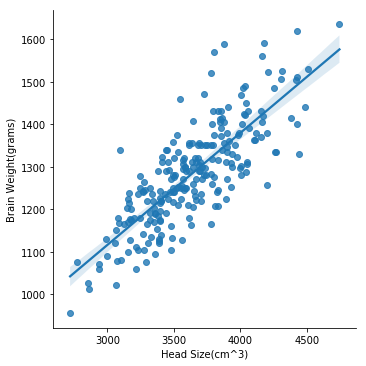

In [10]:
sns.lmplot(data=brain_df, y="Brain Weight(grams)", x="Head Size(cm^3)")

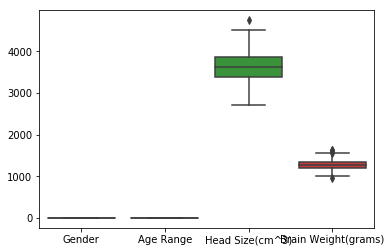

In [11]:
sns.boxplot(data=brain_df)

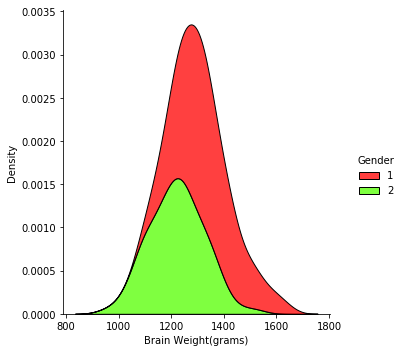

In [12]:
# 1 represents Male, 2 represents Female
sns.displot(data=brain_df, x="Brain Weight(grams)", hue="Gender", multiple="stack", kind="kde", palette='prism')

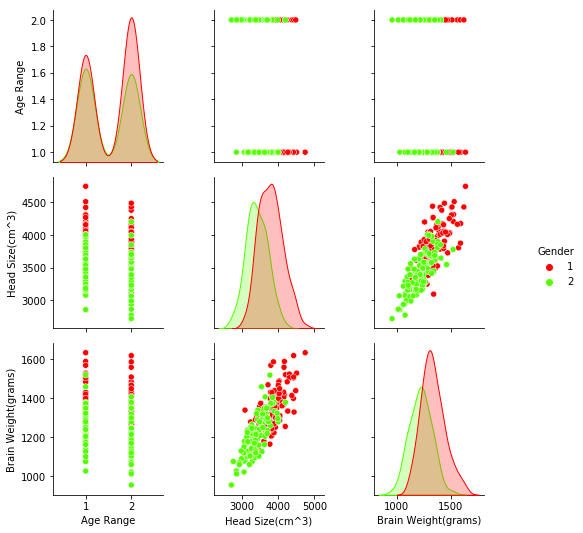

In [13]:
# 1 represents Male, 2 represents Female
sns.pairplot(data=brain_df, hue="Gender", palette='prism')

In [14]:
# 0 represents Male, 1 represents Female
brain_df['Gender'] = brain_df['Gender'].map({1 : 0, 2 : 1})
# 0 represents > 18 years of age, 1 represents < 18 years of age
brain_df['Age Range'] = brain_df['Age Range'].map({1 : 0, 2 : 1})

# Data preparation for training

In [15]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_train = brain_df.sample(frac=0.8, random_state=51)
df_test = brain_df.drop(df_train.index)

In [17]:
X_train = df_train.drop('Brain Weight(grams)', axis=1)
y_train = df_train['Brain Weight(grams)']


X_test = df_test.drop('Brain Weight(grams)', axis=1)
y_test = df_test['Brain Weight(grams)']

In [18]:
X_train.shape

(190, 3)

In [19]:
# cols to normalize
cols = ['Head Size(cm^3)']

In [20]:
mmscaler = MinMaxScaler()

In [21]:
X_train[cols] = mmscaler.fit_transform(X_train[cols])
X_test[cols] = mmscaler.transform(X_test[cols])

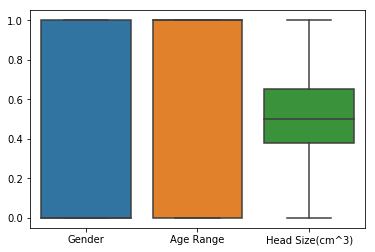

In [22]:
sns.boxplot(data=X_train)

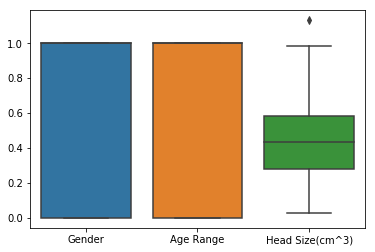

In [23]:
sns.boxplot(data=X_test)

# Training Models

## Linear Regression (only Head Size(cm^3))

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train[['Head Size(cm^3)']], y_train)

LinearRegression()

In [26]:
lr.score(X_test[['Head Size(cm^3)']], y_test)

0.729704751953933

In [27]:
pred_lro = lr.predict(X_test[['Head Size(cm^3)']])

In [28]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_lro))))

RMSE: 71.25792338341813


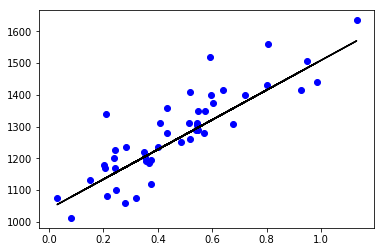

In [29]:
plt.scatter(X_test[['Head Size(cm^3)']], y_test, color = 'b')
plt.plot(X_test[['Head Size(cm^3)']], pred_lro, color = 'k')
  
plt.show()

## Linear Regression (All attributes)

In [30]:
mlr = LinearRegression()

In [31]:
mlr.fit(X_train, y_train)

LinearRegression()

In [32]:
mlr.score(X_test, y_test)

0.7443706812752315

In [33]:
pred_mlr = mlr.predict(X_test)

In [34]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_mlr))))

RMSE: 69.2977745664317


## MLPRegressor

In [35]:
mlpr = MLPRegressor(hidden_layer_sizes=(10, 10), 
                    activation='relu', 
                    solver='adam', 
                    random_state=0, 
                    early_stopping=True, 
                    batch_size=30, 
                    max_iter=2500)

In [36]:
mlpr.fit(X_train, y_train)

MLPRegressor(batch_size=30, early_stopping=True, hidden_layer_sizes=(10, 10),
             max_iter=2500, random_state=0)

In [37]:
mlpr.score(X_test, y_test)

0.737439103171976

In [38]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, mlpr.predict(X_test)))))

RMSE: 70.23102067978834


## Decision Tree

In [39]:
dtr = DecisionTreeRegressor(min_samples_split=75, random_state=1)

In [40]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=75, random_state=1)

In [41]:
dtr.score(X_test, y_test)

0.6888171008654129

In [42]:
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test, dtr.predict(X_test)))))

RMSE: 76.45780359391806


In [43]:
dtr.feature_importances_

array([0., 0., 1.])